# Exploratory Data Analysis(EDA)

*Exploratory Data Analysis (EDA) is the process of examining and summarizing datasets to uncover patterns, relationships, anomalies, and key characteristics, often using statistical techniques and visualizations.*

This notebook analyzes cleaned e-commerce transaction data to uncover
sales trends, customer behavior, and revenue patterns.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(".."))#Also look in the project root for modules
from src.data_cleaning import load_path


In [3]:
df=load_path("../data/processed/data_clean.csv")

In [4]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
406828,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.shape

(406829, 8)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [13]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Which product generate most revenue?

In [14]:
top_products=(
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

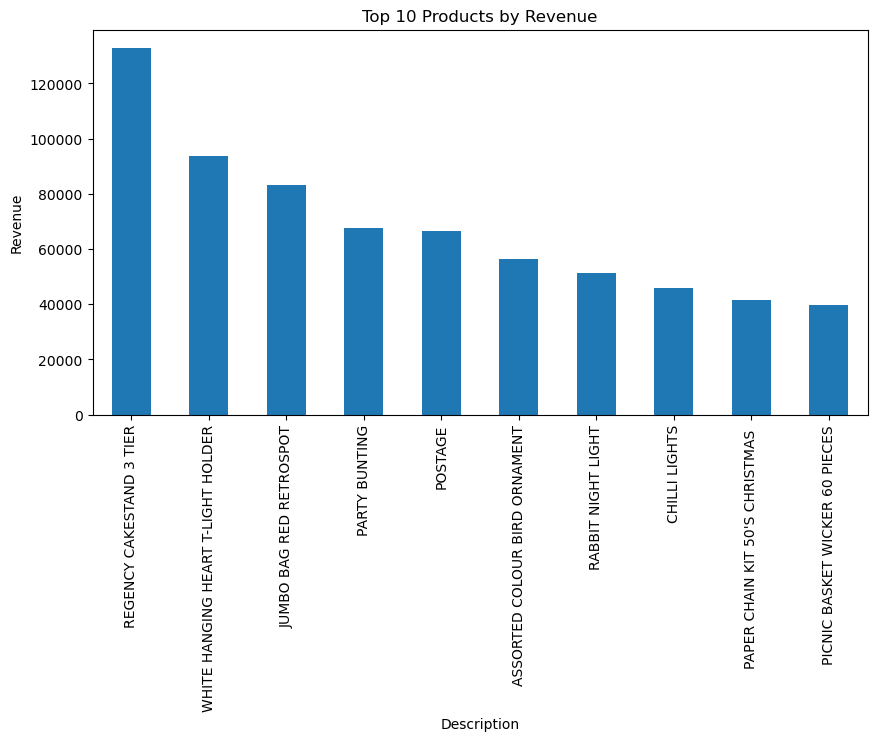

In [15]:
top_products.plot(kind="bar",figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

- *Regency CakeStand 3 Tier* generates the highest total revenue among all products.
- This indicates strong demand and/or higher unit price compared to other items.
- Such products could be prioritized for inventory planning and promotions.

In [16]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
406809,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
406810,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
406811,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
406812,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80
406813,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.80
406814,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
406815,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
406816,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
406817,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
406818,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00


In [17]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Which country generate most revenue?

In [18]:
country_revenue=(
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)  
)
country_revenue

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64

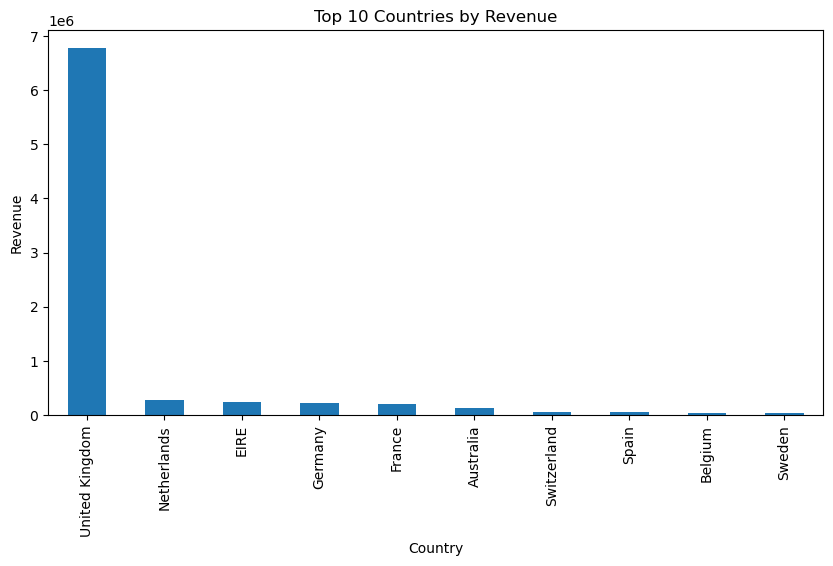

In [19]:
country_revenue.plot(kind="bar",figsize=(10,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()


- The United Kingdom contributes the majority of total revenue.
- Revenue from other countries combined is significantly lower than that of the UK, indicating high market concentration.
- There is an opportunity to grow revenue by expanding sales and marketing efforts in international markets.
- Due to consistently high demand, inventory and supply planning should prioritize the UK market.


who are the top customer by total spending?

In [20]:
df["CustomerID"]=df["CustomerID"].astype(int)
top_customers=(
    df.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalPrice, dtype: float64

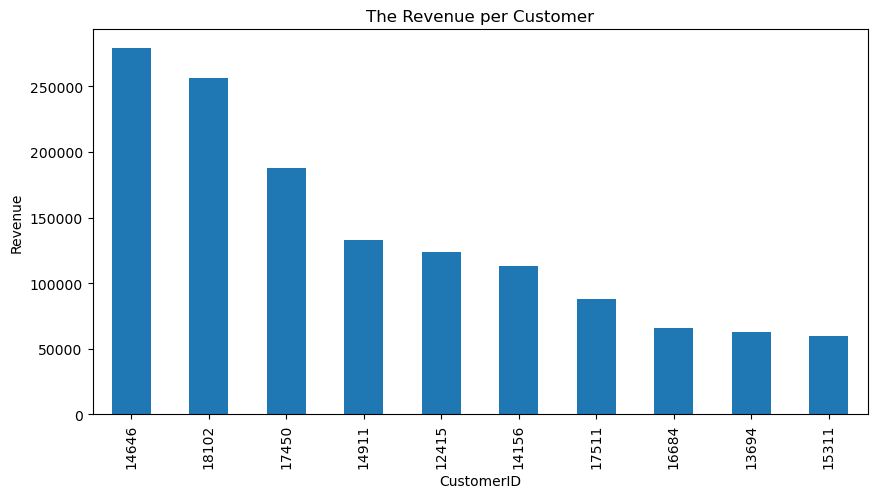

In [21]:
top_customers.plot(kind="bar",figsize=(10,5))
plt.title("The Revenue per Customer")
plt.ylabel("Revenue")
plt.show()

### Top Customers by Revenue
- Customers `14646` and `18102` generate the highest total revenue.
- Several other customers also contribute significantly, showing a small group drives most sales.
- Most top-spending customers are located in the United Kingdom, reflecting the market concentration.
- These insights suggest potential strategies for targeted promotions and loyalty programs.


In [22]:
top_customers_bycountry=(
    df.groupby("Country")["CustomerID"]
    .count()
    .sort_values(ascending=False)
    .head(20)
)
top_customers_bycountry

Country
United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Poland                341
Name: CustomerID, dtype: int64

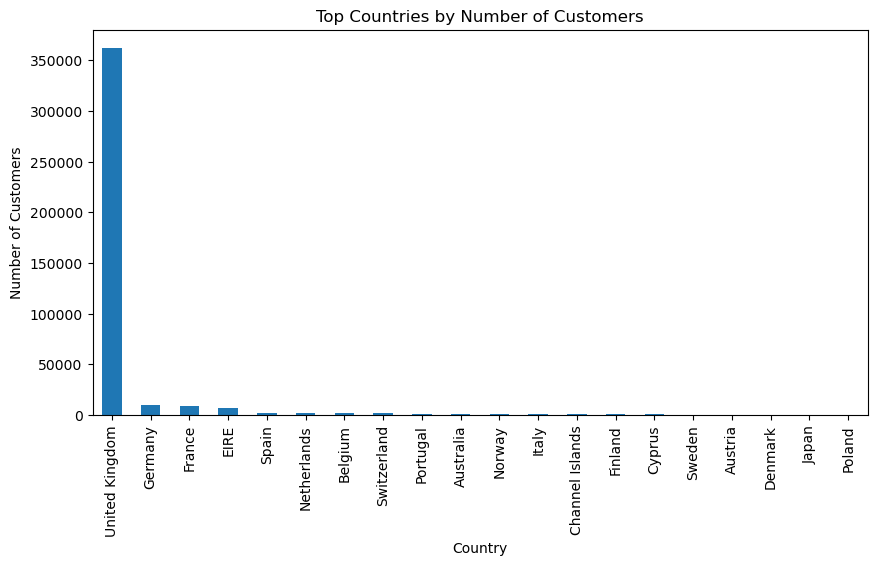

In [23]:
top_customers_bycountry.plot(kind="bar", figsize=(10,5))
plt.title("Top Countries by Number of Customers")
plt.ylabel("Number of Customers")
plt.show()

- The United Kingdom has the highest number of customers: 361,878.
- Germany, France, and EIRE follow, but with far fewer customers: 9,495; 8,491; and 7,485 respectively.
- Other countries like Spain (2,533), Netherlands (2,371), Belgium (2,069), Switzerland (1,877), Portugal (1,480), Australia (1,259), Norway (1,086), and Italy (803) contribute relatively smaller customer bases.
- This shows a **high concentration of customers in the UK**, indicating that the business relies heavily on this market.
- There is potential to **grow the customer base in other countries** through targeted marketing and expansion strategies.

### How does revenue change overtime?

In [24]:
df["Month"]=df["InvoiceDate"].dt.to_period("M")

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [26]:
montly_revenue=df.groupby("Month")["TotalPrice"].sum()
montly_revenue

Month
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-03     579964.610
2011-04     426047.851
2011-05     648251.080
2011-06     608013.160
2011-07     574238.481
2011-08     616368.000
2011-09     931440.372
2011-10     974603.590
2011-11    1132407.740
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64

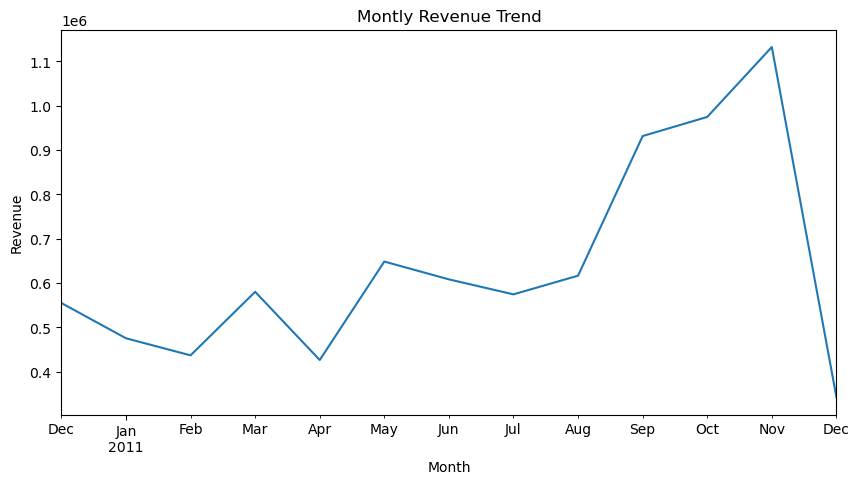

In [27]:
montly_revenue.plot(figsize=(10,5))
plt.title("Montly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

### Revenue Trend Over Time
- From **July to November**, revenue steadily rose, peaking in November.
- This indicates **high seasonal demand** during these months.
- Supply and inventory planning should be prioritized in this period to meet demand efficiently.


In [28]:
montly_revenue.sort_values(ascending=False)

Month
2011-11    1132407.740
2011-10     974603.590
2011-09     931440.372
2011-05     648251.080
2011-08     616368.000
2011-06     608013.160
2011-03     579964.610
2011-07     574238.481
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-04     426047.851
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


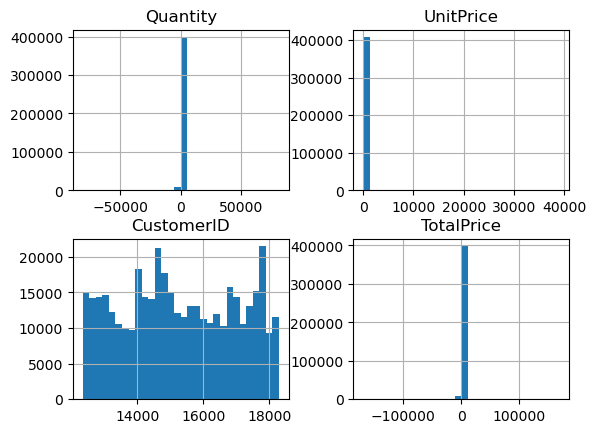

In [30]:
df.select_dtypes(include="number").hist(bins=30)
plt.savefig("Hist.png")

**Overall Quantity Distribution**
- Most transactions have positive quantities, indicating successful sales.
- Returns (negative quantities) are present but form a very small portion of the data.
- Large return quantities are rare, suggesting returns have minimal impact on overall sale.
- X-axis represents the quantity of items per transaction.
- Y-axis represents the frequency of transactions.
- Most transactions involve small positive quantities, while returns are infrequent.


In [31]:
df[df["Quantity"]<0].head(10)#sometime customer return item which is recorded as -

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50,2010-12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65,2010-12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010-12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010-12
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96,2010-12
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40,2010-12
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80,2010-12
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom,-39.60,2010-12
938,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom,-25.50,2010-12


### Quantity Distribution
- Quantity includes negative values, indicating returned or cancelled orders.
- this reflects real-world e-commerce behavior rather than data errors.
- Negative quantities contribute to revenue reduction and should be considered in net revenue analysis


In [32]:
df[df["UnitPrice"]>30000].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
159240,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom,-38970.0,2011-06


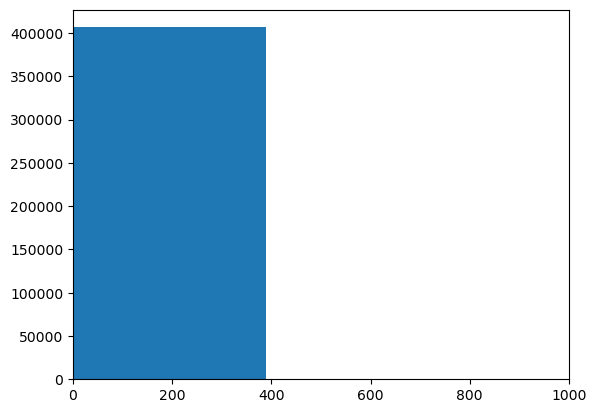

In [33]:
plt.hist(df["UnitPrice"], bins=100)
plt.xlim(0, 1000)
plt.show()

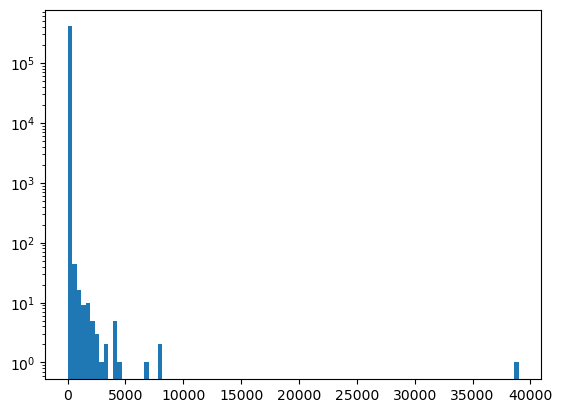

In [34]:
plt.hist(df["UnitPrice"], bins=100)
plt.yscale("log")
plt.show()

**Unitprice**
- X-axis : Unitprice range( 2 - 5 )dollars
- Y-axis  : Frequency (number of transcations)
- The bar height reaching 100000 means:
    - 100000 rows fall in that price range
    - not the quantity of items, but number of transcation

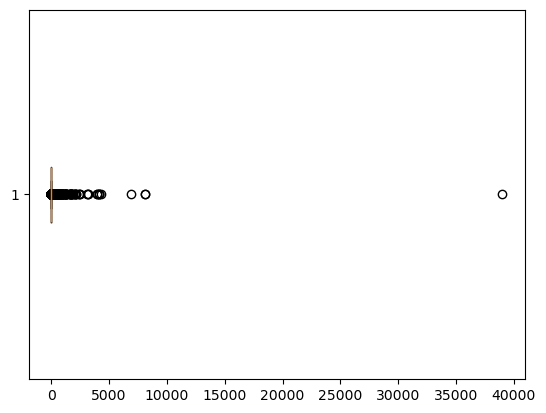

In [35]:
plt.boxplot(df["UnitPrice"], vert=False)#best for outliers
plt.show()

In [36]:
df[(df['UnitPrice']>1) & (df['UnitPrice']<100)].count()

InvoiceNo      312190
StockCode      312190
Description    312190
Quantity       312190
InvoiceDate    312190
UnitPrice      312190
CustomerID     312190
Country        312190
TotalPrice     312190
Month          312190
dtype: int64

In [37]:
df[(df['UnitPrice']>100) & (df['UnitPrice']<300)].count()

InvoiceNo      187
StockCode      187
Description    187
Quantity       187
InvoiceDate    187
UnitPrice      187
CustomerID     187
Country        187
TotalPrice     187
Month          187
dtype: int64

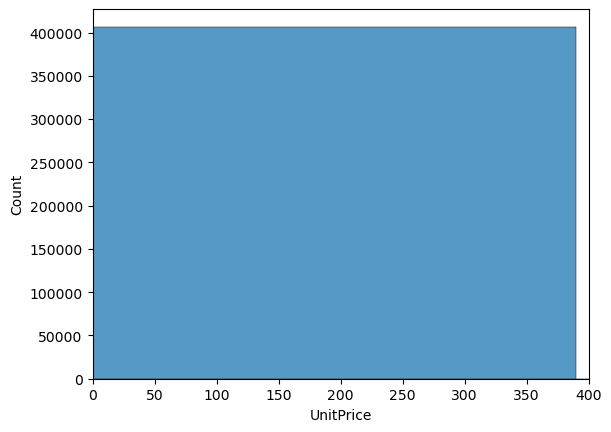

In [38]:
sns.histplot(df["UnitPrice"], bins=100)
plt.xlim(0, 400)
plt.show()

- Histograms aggregate values into bins, which may hide internal variation within a range.
- Extreme outliers increase bin width, compressing common price ranges.
- Filtering or rescaling is necessary for accurate interpretation of dense regions.
- The histogram x-axis represents UnitPrice ranges grouped into bins.
- Bin width determines the level of detail in the distribution.
- Large bin widths can hide variations within dense price ranges.

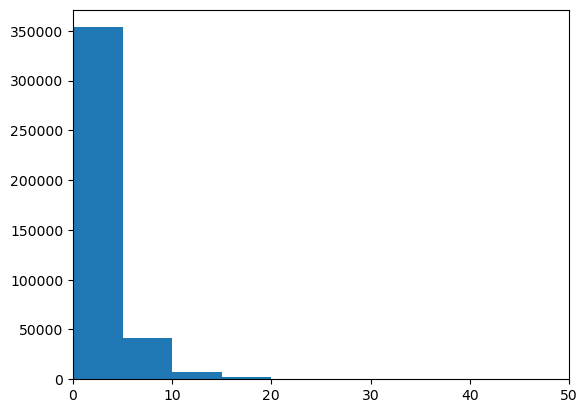

In [39]:
bins=np.arange(0,400+5,5)
plt.hist( df['UnitPrice'],bins=bins)
plt.xlim(0,50
         )
plt.show()

In [40]:
df[(df['UnitPrice']>0) & (df['UnitPrice']<=5)].count()

InvoiceNo      353443
StockCode      353443
Description    353443
Quantity       353443
InvoiceDate    353443
UnitPrice      353443
CustomerID     353443
Country        353443
TotalPrice     353443
Month          353443
dtype: int64

In [41]:

len(df['StockCode'].unique())

3684

In [42]:
df['StockCode'].count()

np.int64(406829)

In [43]:
item_transcation_counts=(df.groupby("Description")["StockCode"].count().sort_values(ascending=False).head(50))
item_transcation_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER     2070
REGENCY CAKESTAND 3 TIER               1905
JUMBO BAG RED RETROSPOT                1662
ASSORTED COLOUR BIRD ORNAMENT          1418
PARTY BUNTING                          1416
LUNCH BAG RED RETROSPOT                1358
SET OF 3 CAKE TINS PANTRY DESIGN       1232
POSTAGE                                1196
LUNCH BAG  BLACK SKULL.                1126
PACK OF 72 RETROSPOT CAKE CASES        1080
PAPER CHAIN KIT 50'S CHRISTMAS         1029
SPOTTY BUNTING                         1029
LUNCH BAG SPACEBOY DESIGN              1021
LUNCH BAG CARS BLUE                    1012
NATURAL SLATE HEART CHALKBOARD          997
HEART OF WICKER SMALL                   996
LUNCH BAG PINK POLKADOT                 977
JAM MAKING SET WITH JARS                974
REX CASH+CARRY JUMBO SHOPPER            955
LUNCH BAG SUKI DESIGN                   950
ALARM CLOCK BAKELIKE RED                932
LUNCH BAG APPLE DESIGN                  907
WOODEN PICTURE FRAME

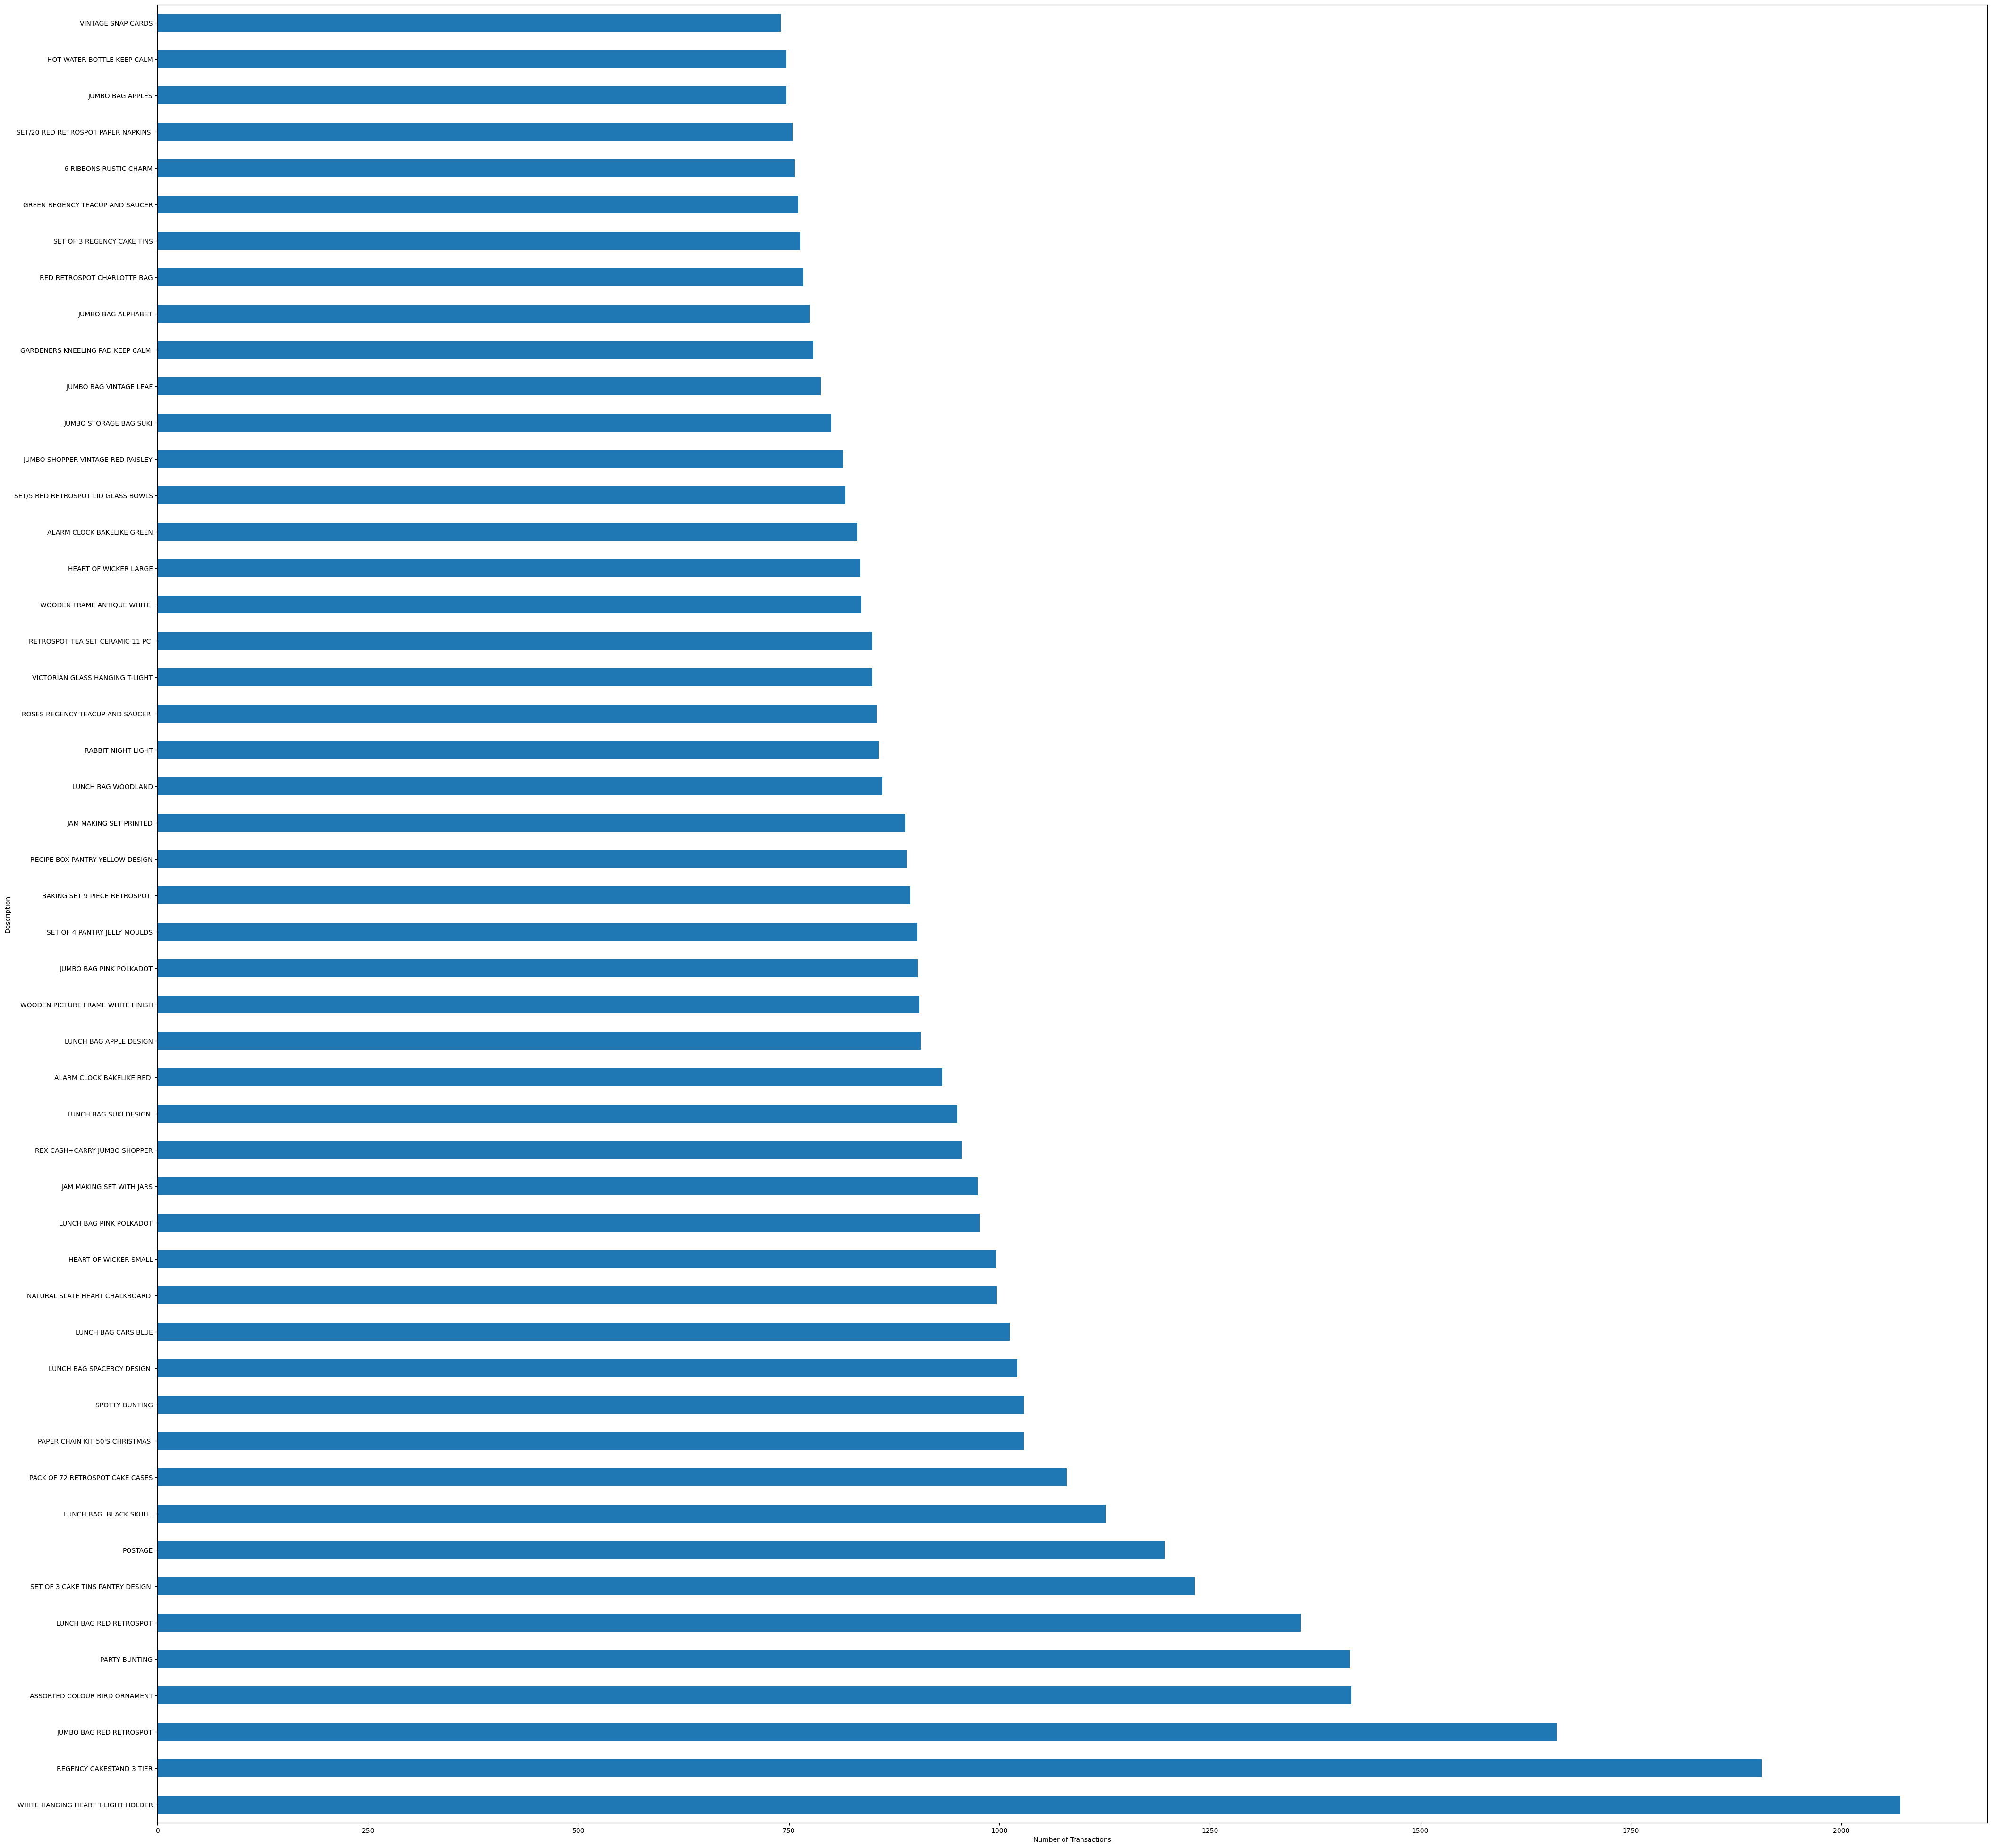

<Figure size 640x480 with 0 Axes>

In [ ]:
item_transcation_counts.plot(kind="barh",figsize=(50,50))
plt.xlabel("Number of Transactions")

plt.ylabel("Description")
plt.show()


In [48]:
df.loc[1]

InvoiceNo                   536365
StockCode                    71053
Description    WHITE METAL LANTERN
Quantity                         6
InvoiceDate    2010-12-01 08:26:00
UnitPrice                     3.39
CustomerID                   17850
Country             United Kingdom
TotalPrice                   20.34
Month                      2010-12
Name: 1, dtype: object

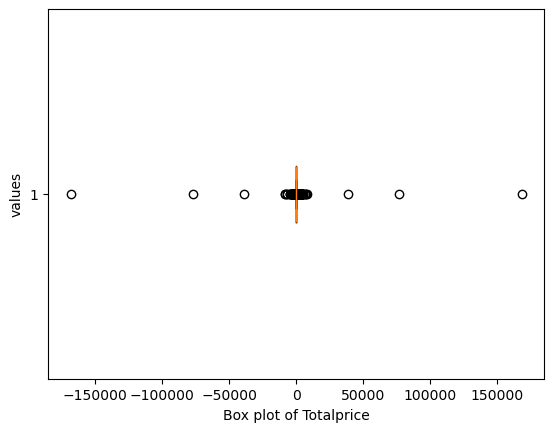

In [57]:
plt.boxplot(df['TotalPrice'],vert=False,whis=1.5)
plt.xlabel("Box plot of Totalprice")
plt.ylabel("values")

plt.show()

In [51]:
df[df['TotalPrice']<-150000].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
406350,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6,2011-12


<Axes: ylabel='TotalPrice'>

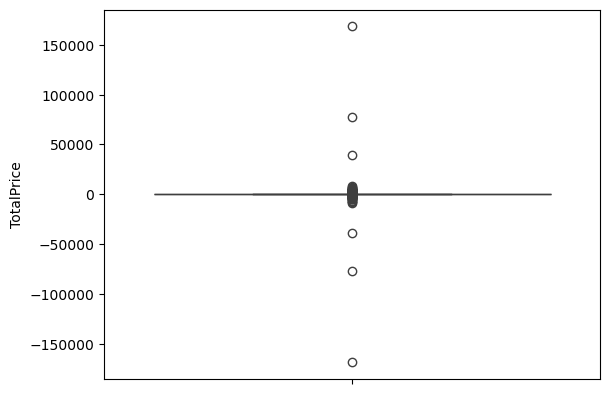

In [56]:
sns.boxplot(df['TotalPrice'])

In [78]:
#i am not able to interpret this so lets exclude outlier
remOutliersDataset=df[(df['TotalPrice']>-50) & (df['TotalPrice']<100)]
print(remOutliersDataset['TotalPrice'].count())
remOutliersDataset.head()

394346


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


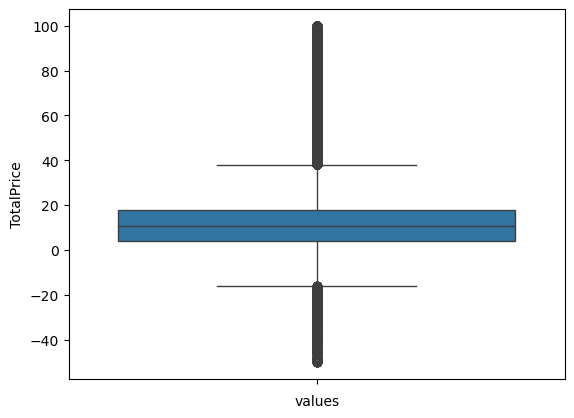

In [80]:
sns.boxplot(y=remOutliersDataset['TotalPrice'])
plt.xlabel("values")
plt.show()

**TotalPrice Distribution (Box Plot)**
- The majority of transactions fall within a low to moderate TotalPrice range.
- The distribution is right-skewed with several high-value outliers.
- Negative TotalPrice values indicate returns or cancelled transactions.

***Transaction Value Insights***
- The middle 50% of transactions fall approximately between $5 and $18, indicating typical purchase values.
- Higher-value transactions extend up to around $38, representing the upper spending range.
- Negative TotalPrice values (−1 to −18) indicate returned or cancelled orders.
- Low-value purchases ($0–$4) are also common, suggesting frequent small-item transactions.

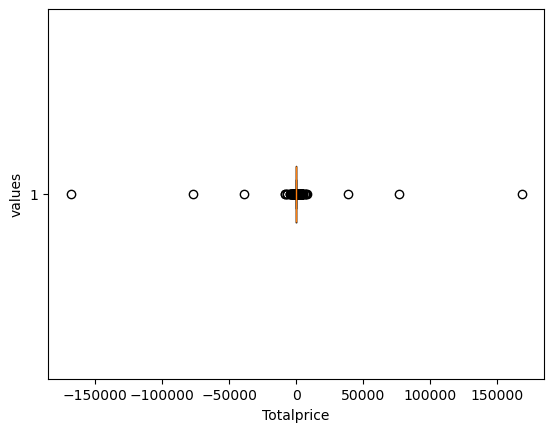

In [73]:
plt.boxplot(df['TotalPrice'],vert=False)
plt.xlabel("Totalprice")
plt.ylabel("values")
plt.show()

In [79]:
df.shape

(406829, 10)

<Axes: ylabel='TotalPrice'>

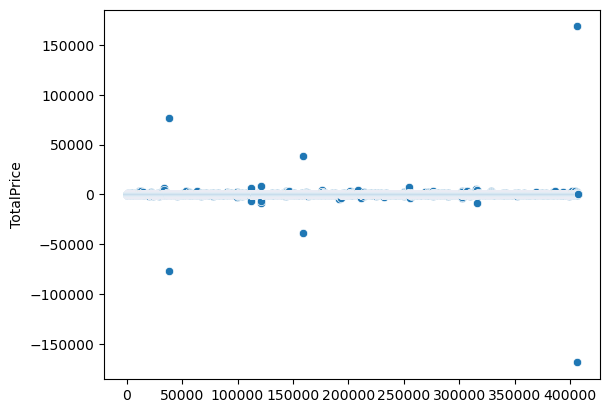

In [81]:
sns.scatterplot(df['TotalPrice'])


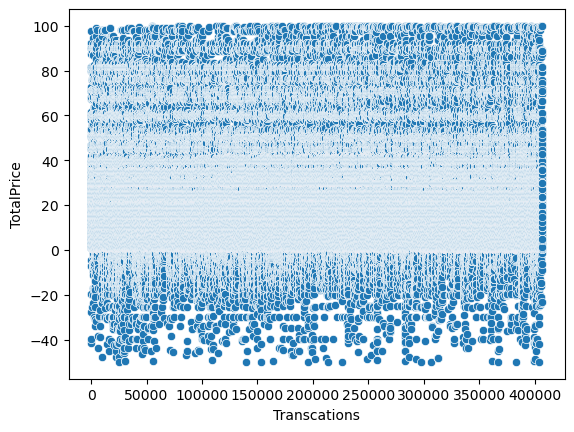

In [87]:
sns.scatterplot(remOutliersDataset['TotalPrice'])
plt.xlabel("Transcations")
plt.show()

This scatter plot visualizes TotalPrice for each transaction in the dataset.
Each point represents a single transaction indexed by row number.
Most transactions are concentrated at low TotalPrice values, indicating small
individual purchases. Negative values represent returned items, which occur
less frequently. A small number of high-value transactions appear as outliers.

Most transactions cluster around low positive TotalPrice values.
High-value transactions are rare and scattered.
Negative values confirm the presence of returns across the dataset.

In [93]:
new_df=df.iloc[400000:df.shape[0]]

In [97]:
new_df[(new_df['TotalPrice']>40) & (new_df['TotalPrice']<100)].count()

InvoiceNo      419
StockCode      419
Description    419
Quantity       419
InvoiceDate    419
UnitPrice      419
CustomerID     419
Country        419
TotalPrice     419
Month          419
dtype: int64

- A subset of data was used to reduce overplotting and improve visual clarity.

The business operates on high-volume, low-price sales with occasional bulk orders.
Returns exist but do not dominate transaction behavior.